In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Walmart Exploratory Data Analysis (EDA)

This project involves a comprehensive exploration of Walmart's sales data to identify key insights and patterns. Our goal is to discover the fundamental factors influencing weekly sales. We will analyze a variety of elements such as holiday impacts, temperature changes, fuel costs, the Consumer Price Index (CPI), and unemployment rates. Through this analysis, we will reveal complex interdependencies and provide strategic recommendations for better resource management and enhancement of retail operations.

## Importing the data

In [12]:
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y'))


## Inspecting the data

In [13]:
#Prints first 10 rows
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [14]:
#Summary statistics of the dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [15]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [16]:
#Provides information about the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Clean the data

In [17]:
# Check for null values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


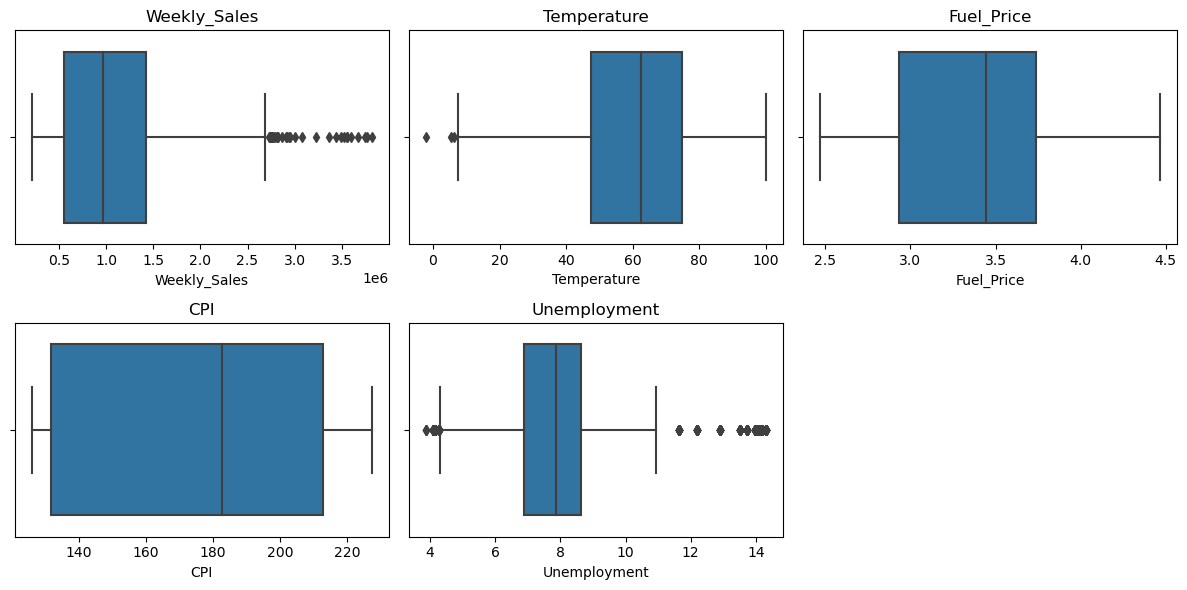

In [18]:
# Handling Outliers
# Identify columns with potential outliers
outlier_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Visualize box plots to detect outliers
plt.figure(figsize=(12, 6))
for col in outlier_columns:
    plt.subplot(2, 3, outlier_columns.index(col) + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Addressing Outliers Using IQR
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Apply outlier removal using IQR
df = df[~((df[outlier_columns] < (Q1 - 1.5 * IQR)) | (df[outlier_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


Note: 518 rows were removed after getting rid of outliers. Our summary stats have changed slightly

### Data Distributions

<Figure size 1600x1000 with 0 Axes>

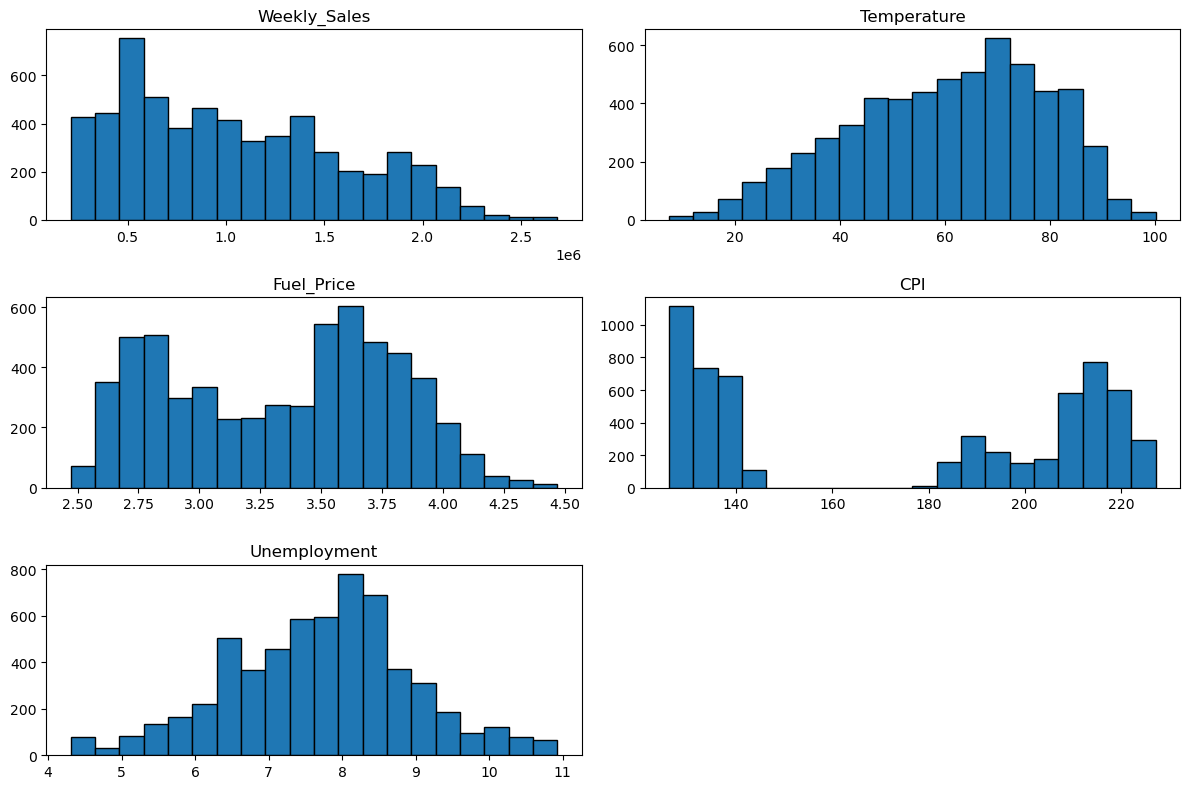

In [20]:
# Visualize Data Distributions
plt.figure(figsize=(16, 10))
ax = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].hist(bins=20, edgecolor='black', grid=False, figsize=(12, 8))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

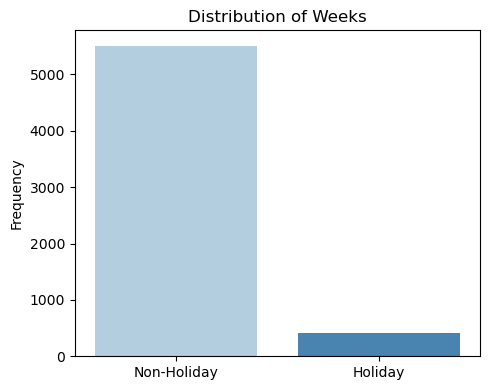

In [21]:

# Count the occurrences of each category
holiday_counts = df['Holiday_Flag'].value_counts()

# Create a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette='Blues')
plt.title('Distribution of Weeks')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()


# Relationship between variables

Establish preliminary connections and identify potential patterns among numerical variables. This serves as a basis for deeper investigation and the discovery of further insights.

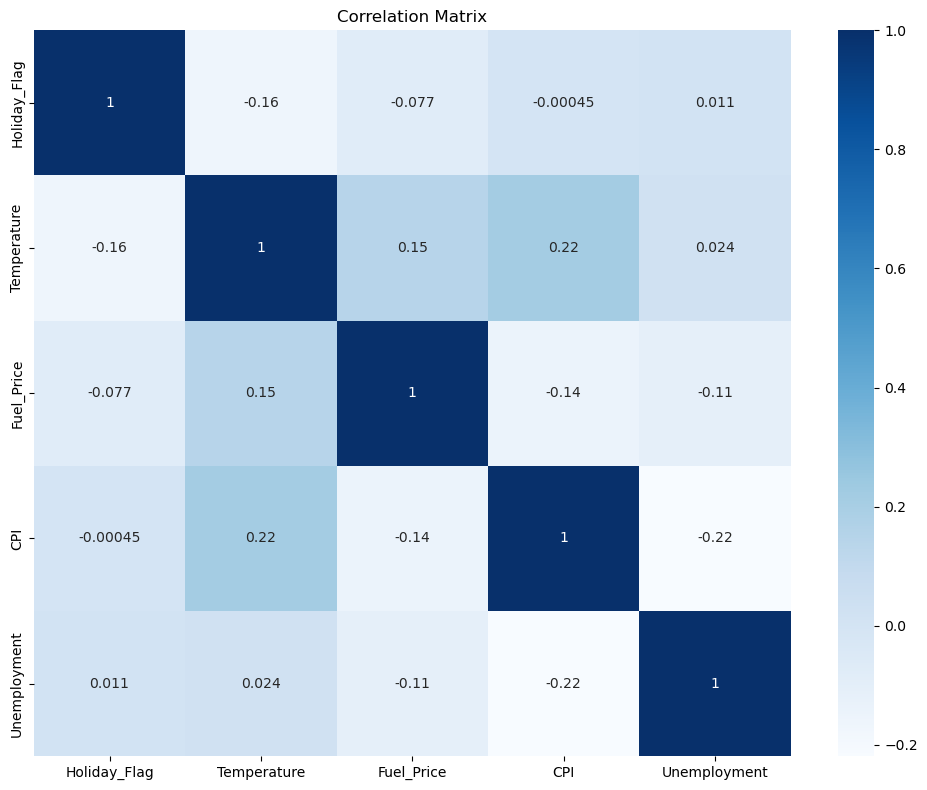

In [22]:
# Correlation Analysis
correlation_matrix = df.drop(columns=['Date', 'Weekly_Sales', 'Store']).corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

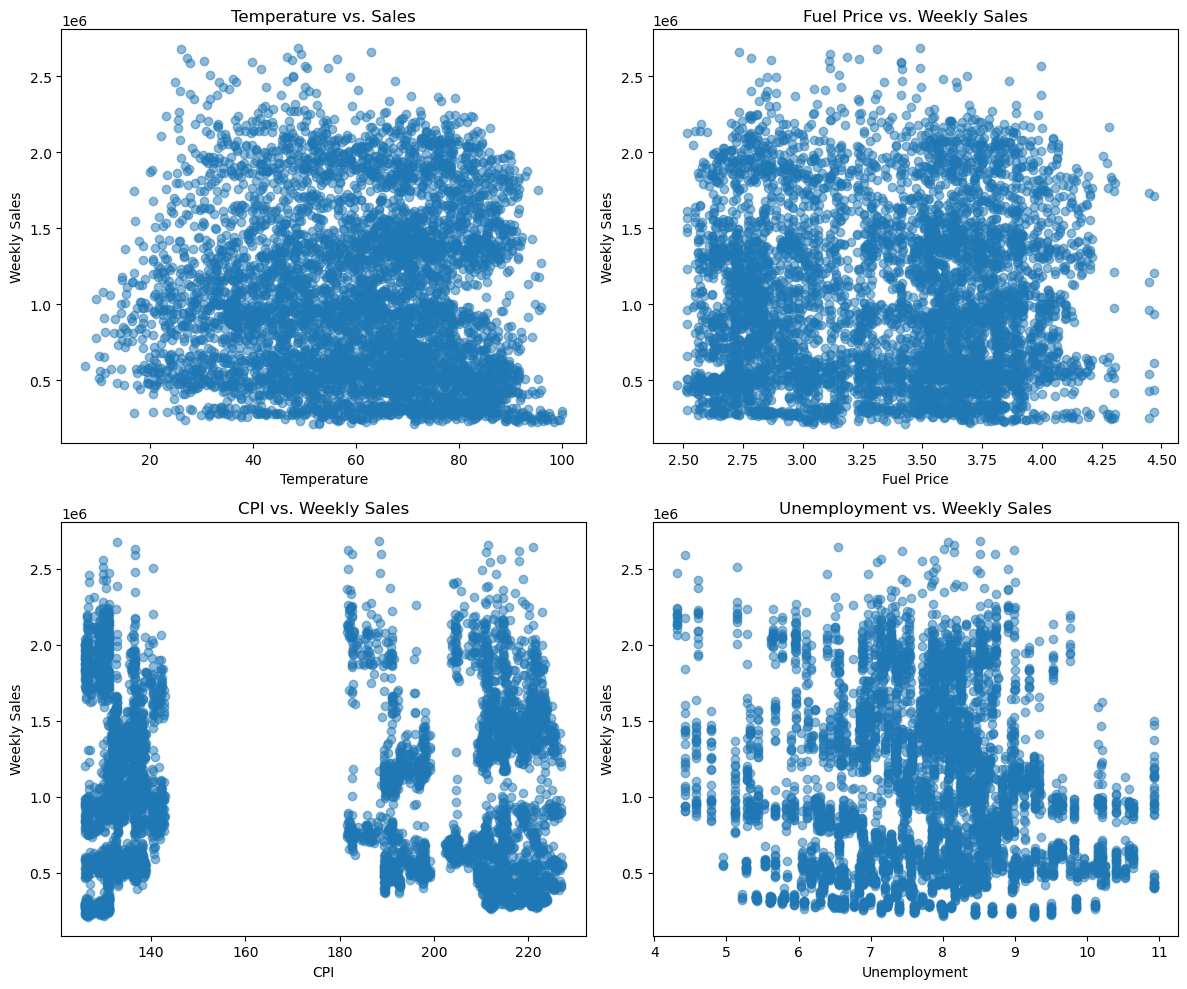

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Temperature vs Sales
axs[0, 0].scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
axs[0, 0].set_title('Temperature vs. Sales')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Weekly Sales')

# Fuel prices vs sales
axs[0, 1].scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5)
axs[0, 1].set_title('Fuel Price vs. Weekly Sales')
axs[0, 1].set_xlabel('Fuel Price')
axs[0, 1].set_ylabel('Weekly Sales')

# CPI vs. Weekly Sales
axs[1, 0].scatter(df['CPI'], df['Weekly_Sales'], alpha=0.5)
axs[1, 0].set_title('CPI vs. Weekly Sales')
axs[1, 0].set_xlabel('CPI')
axs[1, 0].set_ylabel('Weekly Sales')

# Unemployment vs Sales
axs[1, 1].scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.5)
axs[1, 1].set_title('Unemployment vs. Weekly Sales')
axs[1, 1].set_xlabel('Unemployment')
axs[1, 1].set_ylabel('Weekly Sales')

# Adjust layout and display
plt.tight_layout()
plt.show()


# Insights from Variable Correlations in Walmart Sales Data

While the correlations between variables might not always be strong, we can still uncover valuable insights by examining both the correlation matrix and scatterplots.

Weekly Sales and Holiday Flag: There is a notable positive correlation, suggesting that sales peak during holiday weeks. This trend indicates that festive periods potentially boost consumer spending, likely due to special promotions, increased foot traffic, and a higher demand for holiday-specific products.

Interplay Between Weekly Sales, CPI, Unemployment, and Temperature: Weekly sales show inverse relationships with the Consumer Price Index (CPI), unemployment rates, and temperature:

CPI and Unemployment: As CPI and unemployment rates climb, there tends to be a dip in weekly sales, possibly reflecting the broader economic challenges that influence shopping behavior.
Temperature: Sales also decline with rising temperatures, hinting at seasonal shifts in consumer habits or discomfort that discourages shopping.
Consumer Price Index (CPI) and Temperature: The positive correlation here may point to increased costs during warmer months, driven by higher demand for seasonal goods and elevated energy use for cooling, which in turn can push CPI higher.

Unemployment and Temperature: This unexpected positive correlation suggests that higher temperatures might correlate with increased unemployment rates, perhaps due to seasonal fluctuations in certain industries.

CPI and Unemployment: The negative correlation of -0.22 between these variables indicates that higher unemployment might lead to lower CPI, suggesting a deflationary trend where reduced spending power leads to decreased price levels.

These insights allow us to better understand the dynamics affecting Walmart's sales and can guide strategic decisions to optimize performance under varying economic and environmental conditions.

# Analyzing Time Patterns and Seasonal Variations in Sales

Overview of Weekly Sales Trends: By examining how weekly sales shift over time, we gain a fundamental understanding of the overall trajectory of sales. This analysis helps pinpoint significant trends and anomalies in the sales data.

Identification of Seasonal Fluctuations: We delve into identifying consistent trends and fluctuations that emerge during specific months or times of the year. This insight is crucial for anticipating seasonal peaks and troughs in sales performance, enabling more targeted planning and strategy development.

In [24]:
# Total Weekly Sales
total_weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Average Weekly Sales per Store
avg_weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean()

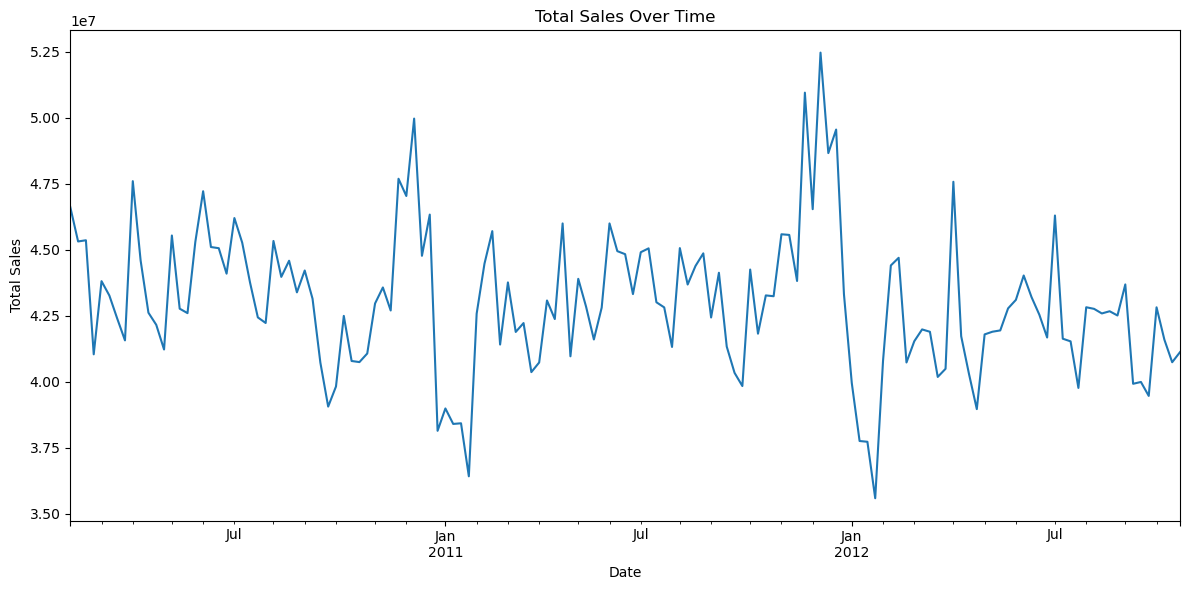

In [25]:
# Total Weekly Sales
plt.figure(figsize=(12, 6))
total_weekly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(False)
plt.tight_layout()
plt.show()



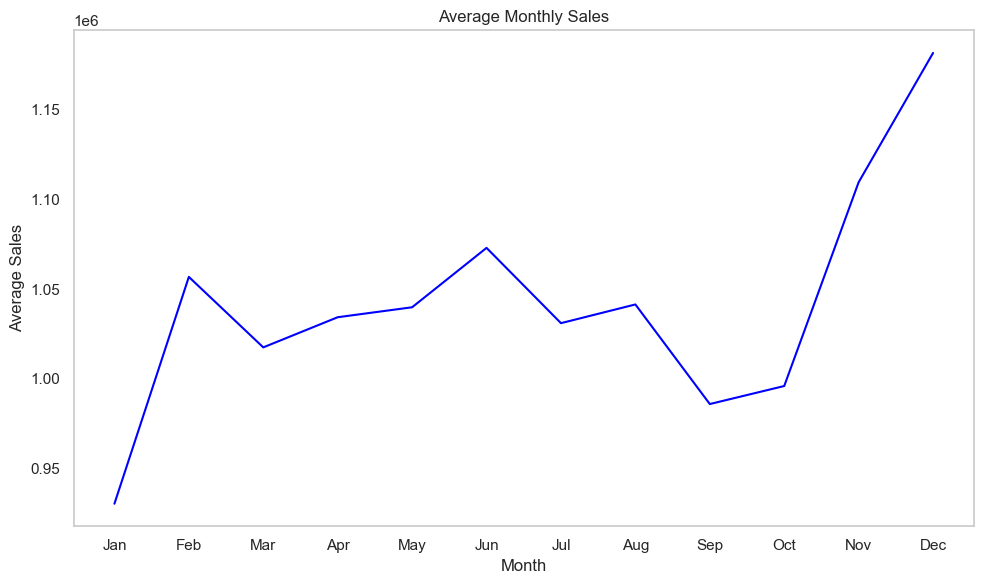

In [26]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average weekly sales for each month
avg_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean()

# Create a list of month names for labeling the x-axis
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Set up style and context
sns.set_style('whitegrid')
sns.set_context('notebook')

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_sales_by_month, color='b', linestyle='-')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), month_names)
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()


# Seasonal Sales Peaks in the 4th Quarter Analysis

Evident Sales Increase in Q4: The data clearly shows a significant rise in sales from October to December each year, likely driven by the holiday season and major shopping events such as Black Friday and Cyber Monday.

Strategic Preparations for the Sales Surge: To capitalize on the expected increase in sales during the 4th quarter, it's essential to ensure adequate inventory levels, launch attractive holiday promotions, and strategically allocate resources. These steps are crucial for maximizing revenue and efficiently handling the anticipated demand during this peak shopping period.










# Impact of Holidays on Sales Performance

Sales Variability During Holiday vs. Non-Holiday Weeks: This analysis aims to grasp the distinct sales impacts during weeks classified as holiday periods compared to regular, non-holiday weeks. Understanding these differences provides insight into consumer behavior and purchasing patterns that fluctuate due to holiday influences.

Comparative Analysis Across Different Stores: By examining how holidays affect sales across various store locations, we can identify unique trends and anomalies. This comparison helps in discerning whether certain stores are more susceptible to holiday-driven sales spikes or if these patterns are consistent across all locations, facilitating tailored promotional strategies and inventory management for each store based on its specific holiday sales trends.









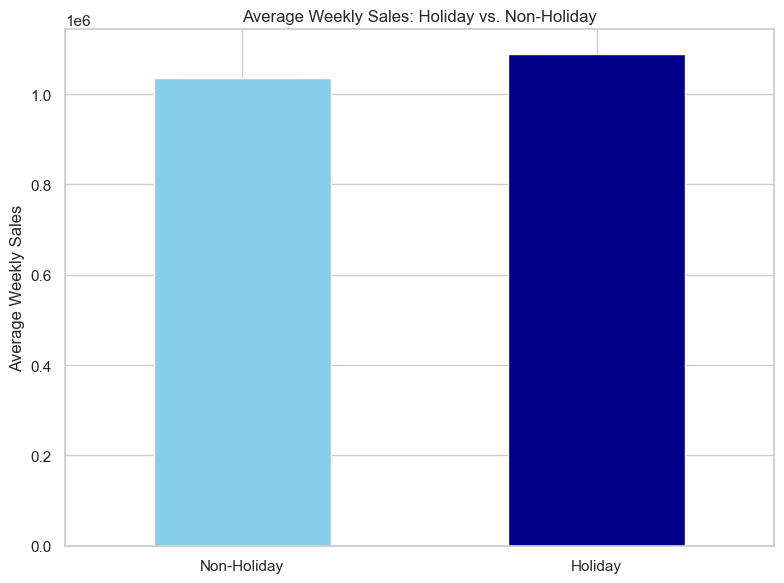

In [27]:
#Weekly Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Holiday Impact
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['skyblue', 'darkblue'])
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

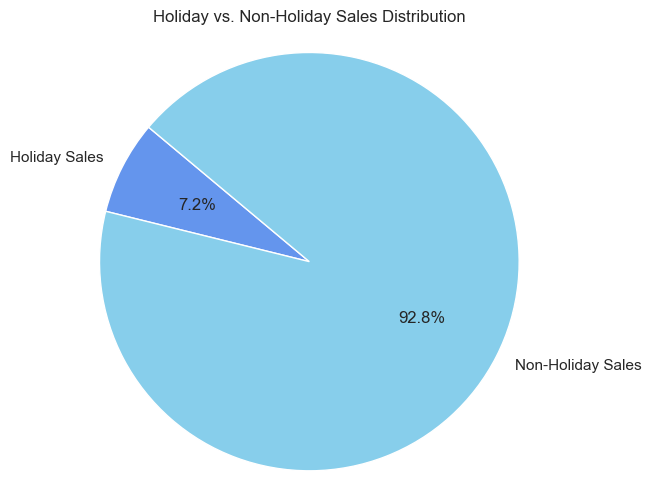

In [28]:

# Calculate total sales for holiday weeks and non-holiday weeks
total_sales = df['Weekly_Sales'].sum()
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()

# Calculate the percentage of total sales from holiday weeks
percentage_holiday_sales = (holiday_sales / total_sales) * 100

# Create a pie chart to visualize the distribution of holiday and non-holiday sales
labels = ['Holiday Sales', 'Non-Holiday Sales']
sizes = [percentage_holiday_sales, 100 - percentage_holiday_sales]
colors = ['cornflowerblue', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Holiday vs. Non-Holiday Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [29]:
# Calculate the total number of holiday weeks
total_holiday_weeks = df['Holiday_Flag'].sum()

# Calculate the total number of weeks
total_weeks = len(df)

# Calculate the percentage of total weeks that are holiday weeks
percentage_holiday_weeks = (total_holiday_weeks / total_weeks) * 100

# Print the calculated percentage
print(f"Percentage of total weeks that are holiday weeks: {percentage_holiday_weeks:.2f}%")


Percentage of total weeks that are holiday weeks: 6.91%


# Proportional Impact of Holiday Weeks on Sales

Despite making up only 6.91% of the year, holiday weeks play a disproportionately larger role in sales performance, contributing to about 7.2% of total sales. This indicates that holiday periods, though relatively brief, exert a more substantial influence on overall sales figures than their limited duration might suggest. This enhanced impact underscores the importance of optimizing holiday strategies to capitalize on this critical sales window.

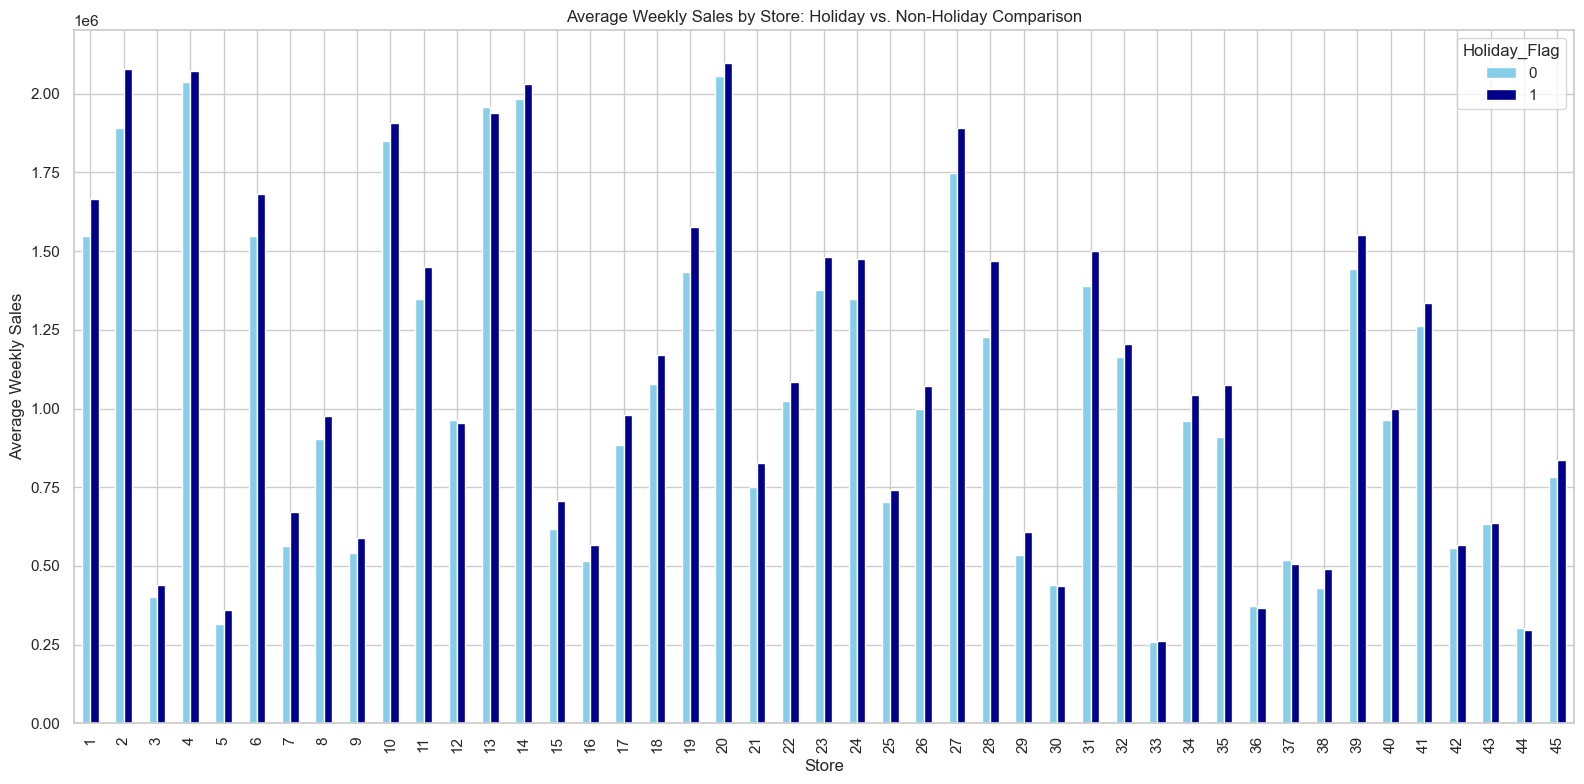

In [30]:
# Holiday Season Analysis
holiday_sales_comparison = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

fig, ax = plt.subplots(figsize=(16, 8))

#Plot the data
holiday_sales_comparison.plot(kind='bar', ax=ax, color=['skyblue', 'darkblue'])

# Customize the plot
ax.set_title('Average Weekly Sales by Store: Holiday vs. Non-Holiday Comparison')
ax.set_xlabel('Store')
ax.set_ylabel('Average Weekly Sales')
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Differential Impact of Holidays on Store Sales

The data reveals a clear variance in how holidays affect stores with different levels of average weekly sales. Stores with lower average sales show a minimal or slightly negative impact from holiday periods. Possible reasons for this could include less aggressive holiday marketing, fewer promotional activities, or a customer demographic less engaged by holiday specials.

Conversely, stores with higher average weekly sales experience a notably positive effect during holidays. This enhanced impact may be attributed to more robust marketing campaigns, compelling holiday discounts, and a customer base more predisposed to spending during festive periods.

These insights are critical for developing tailored holiday strategies across different store segments. For stores with lower sales averages, there's a clear opportunity to revamp holiday marketing approaches to boost customer engagement and sales. Innovative promotions and unique holiday events could be particularly effective. Meanwhile, stores with higher sales averages should continue to focus on aggressive holiday marketing and special offers to sustain and enhance their success during these peak periods.

By understanding and acting on these trends, decision-makers can better align their holiday strategies with the specific needs and potential of each store, optimizing overall sales performance during critical holiday periods.








# Analysis of Weekly Sales Variability Across Stores

Exploring Store-Specific Sales Variability: This analysis delves into the differences in weekly sales among various stores to uncover unique trends, patterns, or outliers. Understanding these variations is essential for recognizing the individual performance of each store.

Identification of Stability vs. Volatility in Sales Patterns: By categorizing stores based on the stability of their sales patterns—whether they exhibit consistent sales figures or significant fluctuations—we can gain valuable insights. This categorization helps in effective resource allocation and strategic planning, utilizing the detailed knowledge of which stores are more predictable and which are prone to sudden changes in sales.

Utilizing Average Weekly Sales Data: By examining the average weekly sales per store, we can pinpoint where each store stands in terms of sales performance relative to others. This metric is instrumental in assessing the operational effectiveness of each location and in identifying high performers or stores that might require intervention due to lower sales figures.

This comprehensive understanding of store performance and sales volatility aids in making informed decisions about inventory management, marketing strategies, and other operational adjustments to optimize overall sales and store performance.

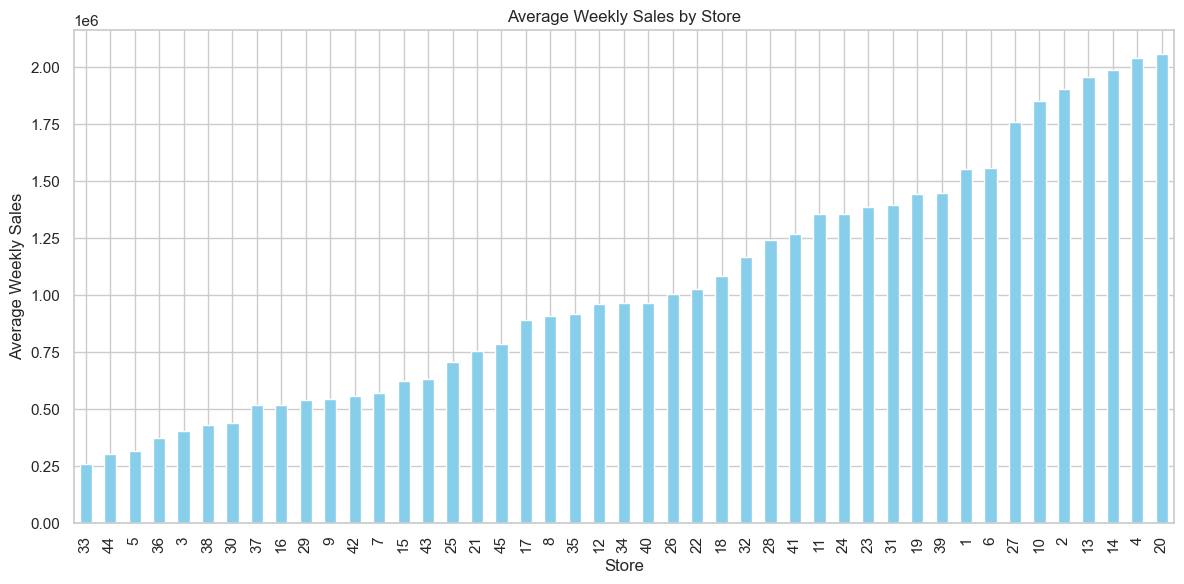

In [63]:
# Average Weekly Sales by Store
plt.figure(figsize=(12, 6))
sorted_avg_weekly_sales = avg_weekly_sales_per_store.sort_values()
sorted_avg_weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Comparative Analysis of Store Sales Performance

The chart offers a clear depiction of sales performance across different stores, highlighting variations in market presence and customer base:

High-Performing Stores: Stores at the upper end of the sales spectrum, like Store 20, which records the highest average weekly sales, demonstrate a robust market presence and a strong customer base. Their high sales figures suggest effective sales strategies and operational efficiency.
Opportunities for Improvement: On the other hand, stores with lower average sales, such as Store 33—whose sales are only about one-eighth of Store 20's—indicate significant potential for growth. These stores require targeted strategies to boost their sales performance, possibly including enhanced marketing efforts, improved store layouts, or expanded product offerings.
This analysis not only highlights the disparities in store performance but also serves as a crucial tool for strategic planning. By understanding these differences, corporate management can tailor approaches for each store based on its specific needs and market conditions, aiming to elevate underperforming stores while maintaining the success of high performers.

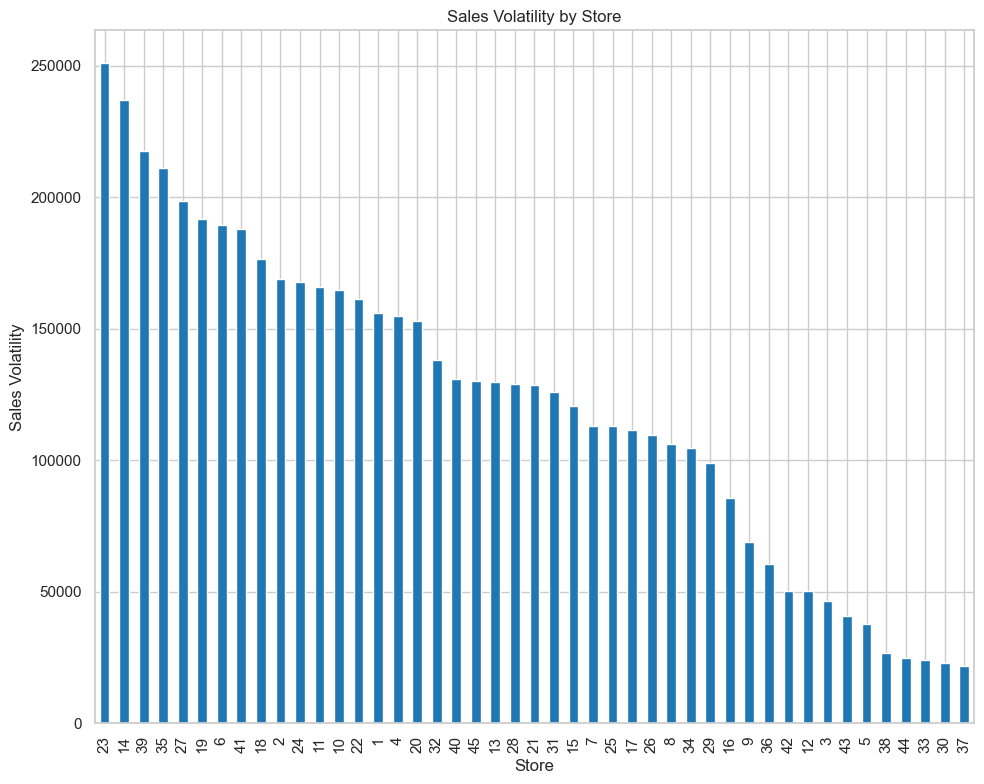

In [64]:
# Sales Volatility
store_volatility = df.groupby('Store')['Weekly_Sales'].std()

# Visualization
plt.figure(figsize=(10, 8))
store_volatility.sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Volatility by Store')
plt.xlabel('Store')
plt.ylabel('Sales Volatility')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Summary of Insights from Walmart Sales Data Analysis

Our comprehensive analysis of Walmart's sales data has revealed several key insights that can significantly influence the company's strategic decisions:

Impact of Holiday Sales: Despite occupying only a modest portion of the calendar year, holiday weeks have a pronounced effect on overall sales. This finding underscores the importance of tailoring inventory and marketing strategies to capitalize on these peak periods.
Store Performance Variability: The analysis identified clear disparities in sales performance across different stores. High-performing stores like Store 20 showcase strong market presence and operational efficiency, while stores like Store 33, which lag significantly in sales, present opportunities for targeted improvement strategies.
Sales Volatility and Inventory Management: Store 23, noted for its high sales volatility, highlights the need for dynamic inventory and supply chain management to accommodate fluctuating demand. Conversely, Store 37, with its stable sales pattern, might benefit from more streamlined inventory practices.

Exploratory Data Analysis (EDA) Insights: Through EDA, we observed trends in weekly sales, assessed the impact of holidays on sales, and explored correlations between sales and external factors such as temperature, CPI, and unemployment. These correlations help identify potential drivers of sales fluctuations and enable strategic adjustments in inventory and marketing efforts.
Strategic Implications for Business Decisions:
Resource Distribution: The significant impact of holiday sales on the total sales volume provides a strategic direction for resource allocation during these key periods.
Tailored Store Strategies: Understanding store-specific sales dynamics allows for the development of customized strategies to uplift underperforming stores and maintain the success of high performers.
Optimization of Operations: Insights into the drivers of sales fluctuations can guide more effective inventory management, tailored marketing strategies, and overall operational enhancements.

Conclusion:
This analysis not only furnishes Walmart with critical insights into its current sales performance and operational challenges but also offers actionable recommendations that can drive growth and improve efficiency. By leveraging these insights, Walmart can enhance its business strategies, ensuring robust performance across all stores and maximizing overall success.






